## Medellin Reales 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

df_B_M = pd.read_csv('datos_sinnorm_sinimput.csv') 
df_B_M = df_B_M.loc[:, ~df_B_M.columns.str.contains('^Unnamed')]

#Medellin

df_M = df_B_M.loc[df_B_M['medellin'] == 1]
df_M = df_M.dropna(subset = ['lat', 'lon'])
df_m = df_M[['lon', 'lat']]

#Eliminacion de Datos Outliers

df_m = df_m.loc[df_m['lat'] >= 6.1]
df_m = df_m.loc[df_m['lat'] <= 6.4]
df_m = df_m.loc[df_m['lon'] >= -75.71034908]
df_m = df_m.loc[df_m['lon'] <= -75.4]

#Creacion del GeoDataFrame con los datos restantes

gdf_geom = gpd.GeoDataFrame(df_m.copy(), geometry = gpd.points_from_xy(df_m.lon, df_m.lat), crs={'init': 'epsg:4326'})
#gdf_geom.to_file('C:/Users/danie/Documents/Daniel/SIMAT/Ubicaciones_Medellin/Ubicaciones_Medellin_Datos_Reales.shp')

#Cargar el mapa de Medellin

sectores = gpd.read_file('C:/Users/danie/Documents/Daniel/SIMAT/Límite_Catastral_de__Comunas_y_Corregimientos/Límite_Catastral_de__Comunas_y_Corregimientos.shp')
#puntos_de_venta_medellin_reales = gpd.read_file('C:/Users/danie/Documents/Daniel/SIMAT/Ubicaciones_Medellin/Ubicaciones_Medellin_Datos_Reales.shp')

#Graficar los puntos en el mapa

#sectores.plot(cmap = 'jet', column = 'NOMBRE', figsize = (10,10))
#puntos_de_venta_medellin_reales.plot()
ax = sectores.plot(color='white', edgecolor='black')
gdf_geom.plot(ax = ax, color = 'red')

#Crear un nuevo GeodataFrame que unicamente contiene los datos que se encuentran dentro del mapa

sectores_con_puntos_de_venta = gpd.sjoin(gdf_geom, sectores, how = "left", op = 'intersects')

#Filtrar el GeoDataFrame, eliminando los datos que no se encuentran en el mapa

sectores_con_puntos_de_venta_Medellin = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta.isna()['SECTOR'].apply(lambda value: not value)]

#Graficar el todos los puntos que se encuentran dentro del mapa

ax = sectores.plot(color='white', edgecolor='black')
sectores_con_puntos_de_venta_Medellin.plot(ax = ax, color = 'red')

#Agregar una columna al DataSet inicial que indique cuales son los puntos que realmente se encuentran dentro del mapa

Medellin_Reales = np.zeros(df_B_M.shape[0])
for i in sectores_con_puntos_de_venta_Medellin.index:
    Medellin_Reales[i] = 1
df_B_M['Medellin Reales'] = Medellin_Reales

#Crear nuevo dataset
#df_B_M.to_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_sinnorm_sinimput_con_Medellin_reales.csv')

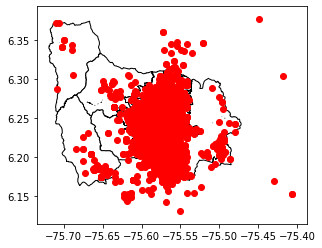

In [2]:
#sectores.plot(cmap = 'jet', column = 'NOMBRE', figsize = (10,10))
#puntos_de_venta_medellin_reales.plot()
ax = sectores.plot(color='white', edgecolor='black')
gdf_geom.plot(ax = ax, color = 'red')

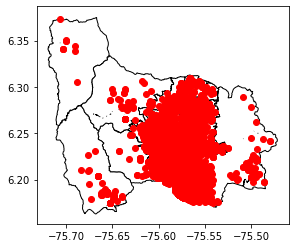

In [3]:
ax = sectores.plot(color='white', edgecolor='black')
sectores_con_puntos_de_venta_Medellin.plot(ax = ax, color = 'red')

## Datos solamente Medellin

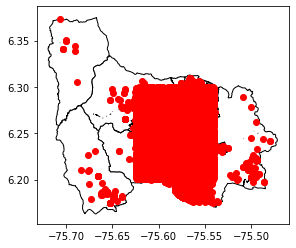

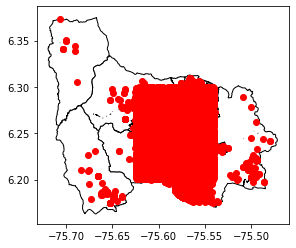

In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import random as rd
from random import uniform

df_B_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_sinnorm_sinimput_con_Medellin_reales.csv')
df_B_M = df_B_M.loc[:, ~df_B_M.columns.str.contains('^Unnamed')]

#filtrar datos que no son de Medellin y unirlos a los que necesitan input de coordenadas
df_M = df_B_M.loc[df_B_M['medellin'] == 1]
df_M_imput = df_M.loc[df_M['lat'].isna()].copy()
df_M_reales = df_M.loc[df_M['Medellin Reales'] == 1]

#Imputacion de coordenadas
df_M_imput['lon'] = df_M_imput['lon'].apply(lambda x: uniform(-75.625,-75.54))
df_M_imput['lat'] = df_M_imput['lat'].apply(lambda x: uniform(6.30,6.20))

# Union de los dos dataframes de nuevo
df_M = df_M_imput.append(df_M_reales)
df_M.reset_index(inplace = True, drop = True)

# Verificamos de nuevo cuales son los datos que no se encuetran dentro del mapa y los filtramos
gdf_M = gpd.GeoDataFrame(df_M.copy(), geometry = gpd.points_from_xy(df_M.lon, df_M.lat), crs={'init': 'epsg:4326'})

sectores = gpd.read_file('C:/Users/danie/Documents/Daniel/SIMAT/Límite_Catastral_de__Comunas_y_Corregimientos/Límite_Catastral_de__Comunas_y_Corregimientos.shp')

ax = sectores.plot(color='white', edgecolor='black')
gdf_M.plot(ax = ax, color = 'red')

sectores_con_puntos_de_venta = gpd.sjoin(gdf_M, sectores, how = "left", op = 'intersects')
sectores_con_puntos_de_venta_Medellin = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta.isna()['SECTOR'].apply(lambda value: not value)]

ax = sectores.plot(color='white', edgecolor='black')
sectores_con_puntos_de_venta_Medellin.plot(ax = ax, color = 'red')

Medellin_Reales = np.zeros(df_M.shape[0])

#print(sectores_con_puntos_de_venta_Medellin)
for i in sectores_con_puntos_de_venta_Medellin.index:
    Medellin_Reales[i] = 1
df_M['Medellin for real'] = Medellin_Reales

df_M = df_M.loc[df_M['Medellin for real'] == 1]

#Eliminamos las columnas medellin y medellin reales ya que no son necesarias
df_M = df_M.drop(['medellin', 'Medellin Reales', 'Medellin for real'], axis = 1)

# Reorganizando el orden del dataset por preferencia propia
df_M = df_M.reindex(columns = ['created_on', 'end_date', 'delta_time', 'lon', 'lat', 'bedrooms', 'bathrooms', 'surface_total', 'property_type', 'price'])

#Crear nuevo dataset
#df_M.to_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_con_cord_imput.csv')

## Filtrar tipos de vivienda (USANDO LIBRERIA)

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_con_cord_imput.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]

# Se crea un LE para sacar el nombre de cada categoria creada por el OHE
le = LabelEncoder()
df_M['property_type'] = le.fit_transform(df_M['property_type'])

# Creacion del OHE, "categories = 'auto'" 
ohe = OneHotEncoder(categories = 'auto')

# Se transforman las columnas
out = ohe.fit_transform(df_M['property_type'].values[:,None])

# Se convierten en un arreglo para poder trabajar con ella
out_array = out.toarray()

# Se crea un arreglo donde guardaremos las categorias de cada columna
ohe_cols = []

# Se crea un for en el que se crearan las columnas adicionales del df con sus respectivos nombres
for category in ohe.categories_[0]:
    col_add = str(le.classes_[category])
    ohe_cols.append(col_add)
    df_M[col_add] = out_array[:,int(category)]

# Eliminamos columna de propiedad
df_M = df_M.drop(['property_type'],axis = 1)

# Guardamos el dataset
# df_M.to_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_con_cord_imput_cat.csv')

## Filtrar tipos de vivienda (MANERA MANUAL)

In [ ]:
import pandas as pd 
import numpy as np

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_sinnorm_sinimput_medellin_only.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]

#crear nuevo dataframe con estrutcura deseada
# NO ES NECESARIO, MANERA MAS SIMPLE EN LA IMPUTACION DE COORDENADAS
df_M_nuevo_completo = pd.DataFrame ({
    'created_on' : df_M['created_on'],
    'end_date' : df_M['end_date'],
    'delta_time' : df_M['delta_time'],
    'lon' : df_M['lon'],
    'lat' : df_M['lat'],
    'surface' : df_M['surface_total'],
    'bedrooms' : df_M['bedrooms'],
    'bathrooms' : df_M['bathrooms'],
    'casa' : np.zeros(df_M.shape[0]),
    'apartamento' : np.zeros(df_M.shape[0]),
    'finca' : np.zeros(df_M.shape[0]),
    'lote' : np.zeros(df_M.shape[0]),
    'oficina' : np.zeros(df_M.shape[0]),
    'local_comercial' : np.zeros(df_M.shape[0]),
    'parqueadero' : np.zeros(df_M.shape[0]),
    'deposito' : np.zeros(df_M.shape[0]),
    'price' : df_M['price']
})

#extraer valores unicos en columna de propiedad
unicos = df_M['property_type'].unique()

#Categorizacion
df_M_nuevo_completo['casa'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[0]) else 0)
df_M_nuevo_completo['apartamento'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[2]) else 0)
df_M_nuevo_completo['finca'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[6]) else 0)
df_M_nuevo_completo['lote'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[5]) else 0)
df_M_nuevo_completo['oficina'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[4]) else 0)
df_M_nuevo_completo['local_comercial'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[8]) else 0)
df_M_nuevo_completo['parqueadero'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[3]) else 0)
df_M_nuevo_completo['deposito'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[7]) else 0)

## Imputacion de Datos (BAÑOS Y CUARTOS)

In [ ]:
import pandas as pd
import numpy as np
import sklearn.impute
from sklearn.impute import SimpleImputer

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_con_cord_imput_cat.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]
print(df_M.shape)

# Instaciar el imputador y aplicarlo al dataframe para las categorias de cuartos y baños
imp_lon = SimpleImputer(strategy = 'mean')
df_M['bedrooms'] = imp_lon.fit_transform(df_M['bedrooms'].values[:,None])

imp_lat = SimpleImputer(strategy = 'mean')
df_M['bathrooms'] = imp_lat.fit_transform(df_M['bathrooms'].values[:,None])

# Eliminar Outliers
df_M = df_M[df_M['bedrooms'] < df_M['bedrooms'].quantile(0.99)]
print(df_M.shape)
df_M = df_M[df_M['bathrooms'] < df_M['bathrooms'].quantile(0.99)]
print(df_M.shape)

# Guardamos el dataset
# df_M.to_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_sinnorm_medellin.csv')

# Filtro de datos por comuna o corregimiento (USANDO LIBRERIA)

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_sinnormt_medellin.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]

#Creacion del GeoDataFrame
gdf_M = gpd.GeoDataFrame(df_M, geometry = gpd.points_from_xy(df_M.lon, df_M.lat), crs={'init': 'epsg:4326'})

sectores = gpd.read_file('C:/Users/danie/Documents/Daniel/SIMAT/Límite_Catastral_de__Comunas_y_Corregimientos/Límite_Catastral_de__Comunas_y_Corregimientos.shp')

#SpatialJoin
sectores_con_puntos = gpd.sjoin(gdf_M, sectores, how = "left", op = 'intersects')

# Se crea un LE para sacar el nombre de cada categoria creada por el OHE
le = LabelEncoder()
sectores_con_puntos['NOMBRE'] = le.fit_transform(sectores_con_puntos['NOMBRE'])

# Creacion del OHE, "categories = 'auto'" 
ohe = OneHotEncoder(categories = 'auto')

# Se transforman las columnas
out = ohe.fit_transform(sectores_con_puntos['NOMBRE'].values[:,None])

# Se convierten en un arreglo para poder trabajar con ella
out_array = out.toarray()

# Se crea un arreglo donde guardaremos las categorias de cada columna
ohe_cols = []

# Se crea un for en el que se crearan las columnas adicionales del df con sus respectivos nombres
for category in ohe.categories_[0]:
    col_add = str(le.classes_[category])
    ohe_cols.append(col_add)
    sectores_con_puntos[col_add] = out_array[:,int(category)]

# Eliminamos columna de propiedad
sectores_con_puntos = sectores_con_puntos.drop(['NOMBRE'],axis = 1)
sectores_con_puntos = sectores_con_puntos.drop(['geometry', 'index_right', 'OBJECTID', 'COMUNA', 'SECTOR', 'SHAPEAREA', 'SHAPELEN'], axis = 1)

# Guardamos el dataset
# sectores_con_puntos.to_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_con_comuna.csv')

# Crear columnas adicionales en dataframe (MANUAL)

In [ ]:
comunas = sectores_con_puntos_de_venta['NOMBRE'].unique()

df_M_nuevo_completo['laureles'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[0]) else 0)
df_M_nuevo_completo['la_candelaria'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[1]) else 0)
df_M_nuevo_completo['el_poblado'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[2]) else 0)
df_M_nuevo_completo['villa_hermosa'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[3]) else 0)
df_M_nuevo_completo['guayabal'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[4]) else 0)
df_M_nuevo_completo['robledo'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[5]) else 0)
df_M_nuevo_completo['altavista'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[6]) else 0)
df_M_nuevo_completo['la_america'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[7]) else 0)
df_M_nuevo_completo['buenos_aires'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[8]) else 0)
df_M_nuevo_completo['belen'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[9]) else 0)
df_M_nuevo_completo['aranjuez'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[10]) else 0)
df_M_nuevo_completo['castilla'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[11]) else 0)
df_M_nuevo_completo['santa_elena'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[12]) else 0)
df_M_nuevo_completo['manrique'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[13]) else 0)
df_M_nuevo_completo['san_javier'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[14]) else 0)
df_M_nuevo_completo['popular'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[15]) else 0)
df_M_nuevo_completo['prado'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[16]) else 0)
df_M_nuevo_completo['12_octubre'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[17]) else 0)
df_M_nuevo_completo['palmitas'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[18]) else 0)
df_M_nuevo_completo['santa_cruz'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[19]) else 0)
df_M_nuevo_completo['san_cristobal'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[20]) else 0)

# Analisis para determinar que variables escalar

StandardScaler

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import math
from sklearn.preprocessing import StandardScaler

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_con_comuna.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]

# Escalamiento de variables
scaler = StandardScaler()
scaled = scaler.fit_transform(df_M[['delta_time', 'bedrooms', 'bathrooms', 'surface_total']])

# El scaler nos da como resultado un numpy array asi que nosotros nos encargaremos de coveritirlo en un dataframe
df_M_scaled = pd.DataFrame(scaled, columns = ['delta_time', 'bedrooms', 'bathrooms', 'surface_total'])

# Cambiar columnas viejas por las escaladas
df_M['delta_time'] = df_M_scaled['delta_time']
df_M['bedrooms'] = df_M_scaled['bedrooms']
df_M['bathrooms'] = df_M_scaled['bathrooms']
df_M['surface_total'] = df_M_scaled['surface_total']
df1 = df_M.loc[:,:'price']
df1['price_real'] = df_M['price'].apply(lambda x: math.exp(x))
df2 = df_M.loc[:,'Apartamento':]
df_M = pd.concat([df1, df2], axis = 1)

# Guardamos el dataset
# df_M.to_csv('C:/Users/danie/Documents/Daniel/SIMAT/datosstand_con_comuna.csv')

# MinMaxScaler 
# no tiene ninguna diferencia con el StandardScaler en los resultados
# se decide utilizar el previo

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.preprocessing import MinMaxScaler

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_con_comuna.csv')
df_M = df_M.loc[:, ~df_M.columns.str.contains('^Unnamed')]

# Escalamiento de variables
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_M[['delta_time', 'bedrooms', 'bathrooms', 'surface_total']])

# El scaler nos da como resultado un numpy array asi que nosotros nos encargaremos de coveritirlo en un dataframe
df_M_scaled = pd.DataFrame(scaled, columns = ['delta_time', 'bedrooms', 'bathrooms', 'surface_total'])

# Cambiar columnas viejas por las escaladas
df_M['delta_time'] = df_M_scaled['delta_time']
df_M['bedrooms'] = df_M_scaled['bedrooms']
df_M['bathrooms'] = df_M_scaled['bathrooms']
df_M['surface_total'] = df_M_scaled['surface_total']
df1 = df_M.loc[:,:'price']
df1['price_real'] = df_M['price'].apply(lambda x: math.exp(x))
df2 = df_M.loc[:,'Apartamento':]
df_M = pd.concat([df1, df2], axis = 1)

# Guardamos el dataset
# df_M.to_csv('C:/Users/danie/Documents/Daniel/SIMAT/datosminmax_con_comuna.csv')